In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
train=imagenes
mean = imagenes.mean(axis=0)
std = imagenes.std(axis=0)
std[std==0]=1.0
for i in range(len(train)):
    train[i] = (train[i]-mean)/std

In [179]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,8, kernel_size=2, stride=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(8,20,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(20,10,kernel_size=1,stride=2),
            torch.nn.ReLU(True),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(10,20,kernel_size=1,stride=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(20,8,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(8,1,kernel_size=2, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
num_epochs = 200
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)
x_train = np.expand_dims(train, 1)
X_train= torch.autograd.Variable(torch.Tensor(x_train).float())

In [180]:
for epoch in range(num_epochs):
    output = model(X_train)
    loss = distance(output, X_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/200], loss:1.1077
epoch [2/200], loss:1.0419
epoch [3/200], loss:1.0059
epoch [4/200], loss:0.9846
epoch [5/200], loss:0.9665
epoch [6/200], loss:0.9492
epoch [7/200], loss:0.9306
epoch [8/200], loss:0.9081
epoch [9/200], loss:0.8816
epoch [10/200], loss:0.8596
epoch [11/200], loss:0.8351
epoch [12/200], loss:0.8089
epoch [13/200], loss:0.7850
epoch [14/200], loss:0.7700
epoch [15/200], loss:0.7642
epoch [16/200], loss:0.7586
epoch [17/200], loss:0.7470
epoch [18/200], loss:0.7351
epoch [19/200], loss:0.7294
epoch [20/200], loss:0.7281
epoch [21/200], loss:0.7258
epoch [22/200], loss:0.7211
epoch [23/200], loss:0.7162
epoch [24/200], loss:0.7126
epoch [25/200], loss:0.7084
epoch [26/200], loss:0.7016
epoch [27/200], loss:0.6943
epoch [28/200], loss:0.6887
epoch [29/200], loss:0.6836
epoch [30/200], loss:0.6763
epoch [31/200], loss:0.6669
epoch [32/200], loss:0.6577
epoch [33/200], loss:0.6509
epoch [34/200], loss:0.6437
epoch [35/200], loss:0.6353
epoch [36/200], loss:0.6271
e

In [181]:
x_transform = model(X_train)
latent_space = model.encoder(X_train)

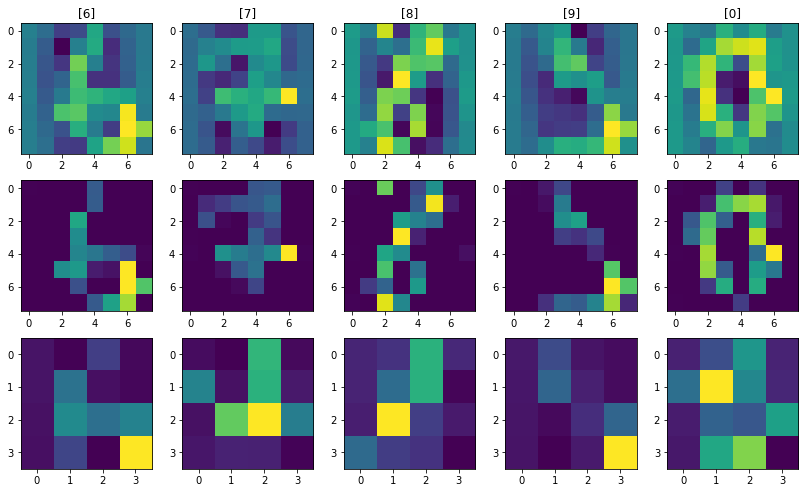

In [182]:
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(imagenes[i+offset])
    plt.title(target[[i+offset]] )
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())